In [3]:
import yfinance
import os
import urllib.request
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings(action='ignore')

In [112]:
import os
import csv
from datetime import datetime
from pycoingecko import CoinGeckoAPI

coins = [
    'bitcoin', 'ethereum', 'litecoin', 'ripple', 'bitcoin-cash',
    'cardano', 'dogecoin', 'polkadot', 'chainlink', 'stellar', 'binancecoin', 'eos', 'monero', 'tron',
    'vechain', 'iota', 'filecoin', 'tezos'
]

start_date = "2017-01-01"
end_date = "2023-01-01"

cg = CoinGeckoAPI()

# Create a folder to store CSV files
if not os.path.exists("coingecko_data"):
    os.makedirs("coingecko_data")

for coin in coins:
    historical_data = cg.get_coin_market_chart_range_by_id(id=coin, vs_currency='usd', from_timestamp=int(datetime.strptime(start_date, "%Y-%m-%d").timestamp()), to_timestamp=int(datetime.strptime(end_date, "%Y-%m-%d").timestamp()))
    
    if historical_data:
        data = historical_data['prices']
        
        # Create CSV file
        csv_filename = f"coingecko_data/{coin}_data.csv"
        with open(csv_filename, mode='w', newline='') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerow(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
            for entry in data:
                timestamp = datetime.utcfromtimestamp(entry[0] / 1000).strftime('%Y-%m-%d')
                price_usd = entry[1]
                csv_writer.writerow([timestamp, price_usd, price_usd, price_usd, price_usd, price_usd])  # Fill in placeholder values for open, high, low, close, and volume
        
        print(f"Saved {coin} data to {csv_filename}")
    else:
        print(f"Failed to fetch data for {coin}")

print("Data retrieval and saving complete.")


Saved bitcoin data to coingecko_data/bitcoin_data.csv
Saved ethereum data to coingecko_data/ethereum_data.csv
Saved litecoin data to coingecko_data/litecoin_data.csv
Saved ripple data to coingecko_data/ripple_data.csv
Saved bitcoin-cash data to coingecko_data/bitcoin-cash_data.csv
Saved cardano data to coingecko_data/cardano_data.csv
Saved dogecoin data to coingecko_data/dogecoin_data.csv
Saved polkadot data to coingecko_data/polkadot_data.csv
Saved chainlink data to coingecko_data/chainlink_data.csv
Saved stellar data to coingecko_data/stellar_data.csv
Saved binancecoin data to coingecko_data/binancecoin_data.csv
Saved eos data to coingecko_data/eos_data.csv
Saved monero data to coingecko_data/monero_data.csv
Saved tron data to coingecko_data/tron_data.csv
Saved vechain data to coingecko_data/vechain_data.csv
Saved iota data to coingecko_data/iota_data.csv
Saved filecoin data to coingecko_data/filecoin_data.csv
Saved tezos data to coingecko_data/tezos_data.csv
Data retrieval and savin

In [128]:
import os
import csv
import requests
from datetime import datetime

coins = [
    'BTC', 'ETH', 'LTC', 'XRP', 'BCH',
    'ADA', 'DOGE', 'DOT', 'LINK', 'MATIC',
    'XLM', 'BNB', 'EOS', 'XMR', 'TRX',
    'VET', 'THETA', 'IOTA', 'FIL', 'XTZ'
]

start_date = "2017-01-01"
end_date = "2023-01-01"

# Create a folder to store CSV files
if not os.path.exists("coin_data"):
    os.makedirs("coin_data")

for coin in coins:
    url = f"https://min-api.cryptocompare.com/data/v2/histoday"
    params = {
        "fsym": coin,
        "tsym": "USD",
        "limit": 2000,  # Maximum data points CryptoCompare allows per request
        "toTs": int(datetime.strptime(end_date, "%Y-%m-%d").timestamp()),
    }
    
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json().get('Data', {}).get('Data', [])

        if data:
            # Create CSV file
            csv_filename = f"coin_data/{coin}_data.csv"
            with open(csv_filename, mode='w', newline='') as csv_file:
                csv_writer = csv.writer(csv_file)
                csv_writer.writerow(['timestamp', 'high', 'low', 'open', 'close', 'volume'])
                
                for entry in data:
                    Date = datetime.utcfromtimestamp(entry['time']).strftime('%Y-%m-%d')
                    High = entry['high']
                    Low = entry['low']
                    Open = entry['open']
                    Close = entry['close']
                    Volume = entry['volumefrom']
                    
                    csv_writer.writerow([Date, High, Low, Open, Close, Volume])
        
            print(f"Saved {coin} data to {csv_filename}")
        else:
            print(f"No data found for {coin}")
    else:
        print(f"Failed to fetch data for {coin}. Status code: {response.status_code}")

print("Data retrieval and saving complete.")

Saved BTC data to coin_data/BTC_data.csv
Saved ETH data to coin_data/ETH_data.csv
Saved LTC data to coin_data/LTC_data.csv
Saved XRP data to coin_data/XRP_data.csv
Saved BCH data to coin_data/BCH_data.csv
Saved ADA data to coin_data/ADA_data.csv
Saved DOGE data to coin_data/DOGE_data.csv
Saved DOT data to coin_data/DOT_data.csv
Saved LINK data to coin_data/LINK_data.csv
Saved MATIC data to coin_data/MATIC_data.csv
Saved XLM data to coin_data/XLM_data.csv
Saved BNB data to coin_data/BNB_data.csv
Saved EOS data to coin_data/EOS_data.csv
Saved XMR data to coin_data/XMR_data.csv
Saved TRX data to coin_data/TRX_data.csv
Saved VET data to coin_data/VET_data.csv
Saved THETA data to coin_data/THETA_data.csv
No data found for IOTA
Saved FIL data to coin_data/FIL_data.csv
Saved XTZ data to coin_data/XTZ_data.csv
Data retrieval and saving complete.


In [ ]:


# Define the ticker symbols for the coins you want to fetch
ticker_symbols = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'XRP-USD', 'BCH-USD', 'ADA-USD', 'DOGE-USD', 'DOT1-USD', 'LINK-USD', 'MATIC-USD', 'XLM-USD', 'BNB-USD', 'EOS-USD', 'XMR-USD', 'TRX-USD', 'VET-USD', 'THETA-USD', 'MIOTA-USD', 'FIL-USD', 'XTZ-USD']

# Define the date range you want to fetch
start_date = '2017-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Create a folder to store the CSV files (if it doesn't exist)
output_folder = 'my_coins'
os.makedirs(output_folder, exist_ok=True)

# Fetch data for each coin and save it as a CSV file
for ticker_symbol in ticker_symbols:
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    data.reset_index(inplace=True)
    output_file = os.path.join(output_folder, f'{ticker_symbol.lower()}_data.csv')
    data.to_csv(output_file, index=False)

print("Data downloaded and saved successfully.")


In [8]:
data1 = pd.read_csv('coin_data/BTC_data.csv')
data1 = data1.rename(columns={'timestamp': 'Date', })

data1.head()

,Date,high,low,open,close,volume
0,2017-07-11,2412.75,2265.48,2344.02,2324.29,146630.20
1,2017-07-12,2424.82,2262.08,2324.29,2403.09,109522.90
2,2017-07-13,2436.66,2334.96,2403.09,2362.44,88166.37
3,2017-07-14,2370.53,2165.36,2362.44,2234.17,114411.35
4,2017-07-15,2237.13,1974.03,2234.17,1975.08,155317.39


In [4]:
data2 = pd.read_csv('my_coins/btc-usd.csv')
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [5]:
data2 = data2.drop(columns=['Adj Close'])


In [124]:
data2.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008


In [9]:
data3 = pd.read_csv('coingecko_data/bitcoin_data.csv')
data3.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-01,998.050000,998.050000,998.050000,998.050000,998.050000
1,2017-01-02,1019.198800,1019.198800,1019.198800,1019.198800,1019.198800
2,2017-01-03,1035.531300,1035.531300,1035.531300,1035.531300,1035.531300
3,2017-01-04,1130.849516,1130.849516,1130.849516,1130.849516,1130.849516
4,2017-01-05,990.667500,990.667500,990.667500,990.667500,990.667500


In [10]:
import pandas as pd


# List of DataFrames to concatenate
data_frames = [data1[['Date', 'open', 'high', 'low', 'close', 'volume']],
               data2[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']],
               data3[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]]
# Concatenate DataFrames along rows (axis=0)
btc = pd.concat(data_frames, axis=0, ignore_index=True)

btc['Date'] = pd.to_datetime(btc['Date'])
btc = btc.drop_duplicates(subset=['Date'], keep='first')
btc = btc.fillna(0)


# Display the merged DataFrame
print(btc)


           Date     open     high      low    close     volume          Open  \
0    2017-07-11  2344.02  2412.75  2265.48  2324.29  146630.20      0.000000   
1    2017-07-12  2324.29  2424.82  2262.08  2403.09  109522.90      0.000000   
2    2017-07-13  2403.09  2436.66  2334.96  2362.44   88166.37      0.000000   
3    2017-07-14  2362.44  2370.53  2165.36  2234.17  114411.35      0.000000   
4    2017-07-15  2234.17  2237.13  1974.03  1975.08  155317.39      0.000000   
...         ...      ...      ...      ...      ...        ...           ...   
4399 2023-07-27     0.00     0.00     0.00     0.00       0.00  29353.798828   
4400 2023-07-28     0.00     0.00     0.00     0.00       0.00  29212.164062   
4401 2023-07-29     0.00     0.00     0.00     0.00       0.00  29319.445312   
4402 2023-07-30     0.00     0.00     0.00     0.00       0.00  29357.093750   
4403 2023-07-31     0.00     0.00     0.00     0.00       0.00  29278.314453   

              High           Low       

In [11]:
btc.head()

,Date,open,high,low,close,volume,Open,High,Low,Close,Volume
0,2017-07-11,2344.02,2412.75,2265.48,2324.29,146630.20,0.0,0.0,0.0,0.0,0.0
1,2017-07-12,2324.29,2424.82,2262.08,2403.09,109522.90,0.0,0.0,0.0,0.0,0.0
2,2017-07-13,2403.09,2436.66,2334.96,2362.44,88166.37,0.0,0.0,0.0,0.0,0.0
3,2017-07-14,2362.44,2370.53,2165.36,2234.17,114411.35,0.0,0.0,0.0,0.0,0.0
4,2017-07-15,2234.17,2237.13,1974.03,1975.08,155317.39,0.0,0.0,0.0,0.0,0.0


In [12]:
import pandas as pd
import yfinance as yf

# Define the ticker symbols for the coins you want to fetch
ticker_symbols = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'XRP-USD', 'BCH-USD']

start_date = '2017-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Create an empty list to store the transformed DataFrames
transformed_dataframes = []

# Fetch data for each coin and perform transformations
for ticker_symbol in ticker_symbols:
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    data.reset_index(inplace=True)
    
    # Calculate daily returns
    data['Daily_Return'] = data['Close'].pct_change()
    

    data['Symbol'] = ticker_symbol
    
    transformed_dataframes.append(data)

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(transformed_dataframes, ignore_index=True)

# Display the combined DataFrame in a Jupyter Notebook or similar environment
print(combined_data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
            Date         Open         High          Low        Close  \
0     2017-01-01   963.658020  1003.080017   958.698975   998.325012   
1     2017-01-02   998.617004  1031.390015   996.702026  1021.750000   
2     2017-01-03  1021.599976  1044.079956  1021.599976  1043.839966   
3     2017-01-04  1044.400024  1159.420044  1044.400024  1154.729980   
4     2017-01-05  1156.729980  1191.099976   910.416992  1013.380005   
...          ...          ...          ...          ...          ...   
11114 2023-08-04   225.392334   229.179352   222.111755   227.184799   
11115 2023-08-05   227.172760   228.038696   223.521927   226.711594   
11116 2

In [2]:
import pandas as pd
import yfinance as yf

# Define the ticker symbols for the coins you want to fetch
ticker_symbols = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'XRP-USD', 'BCH-USD']

# Define the date range you want to fetch
start_date = '2017-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Create an empty list to store the transformed DataFrames
transformed_dataframes = []

# Fetch data for each coin and perform transformations
for ticker_symbol in ticker_symbols:
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    data.reset_index(inplace=True)
    
    # Calculate daily returns
    data['Daily_Return'] = data['Close'].pct_change()
    
    # Add a Symbol column
    data['Symbol'] = ticker_symbol
    
    transformed_dataframes.append(data)

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(transformed_dataframes, ignore_index=True)

# Data Quality Checks
# Check for missing values
missing_values = combined_data.isnull().sum()

# Check for outliers
outliers = combined_data[combined_data['Close'] > combined_data['Close'].quantile(0.99)]

# Data Consistency Checks
# Check for consistent units (assumed)
# You can add more sophisticated consistency checks based on your data characteristics

# Display Data Quality and Consistency Reports
print("Missing Values:\n", missing_values)
print("\nOutliers:\n", outliers)
print("\nCombined Data Info:\n", combined_data.info())

# Save the combined and transformed DataFrame
# In a real scenario, you might save this to a database or data warehouse
# combined_data.to_csv('combined_data.csv', index=False)

print("Data integrated, transformed, and quality checks performed.")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Missing Values:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily_Return    5
Symbol          0
dtype: int64

Outliers:
            Date          Open          High           Low         Close  \
1510 2021-02-19  51675.980469  56113.652344  50937.277344  55888.132812   
1511 2021-02-20  55887.335938  57505.226562  54626.558594  56099.519531   
1512 2021-02-21  56068.566406  58330.570312  55672.609375  57539.945312   
1528 2021-03-09  52272.968750  54824.117188  51981.832031  54824.117188   
1529 2021-03-10  54824.011719  57258.253906  53290.890625  56008.550781   
.

In [4]:
btc = pd.read_csv('data/btc-usd.csv', header=0, usecols=['timestamp','close'], parse_dates=['timestamp'], index_col=['timestamp'])

btc = btc.rename(columns={'close': 'price'})
btc.head()

,price
timestamp,
2013-10-06,122.00
2013-10-07,123.61
2013-10-08,124.18
2013-10-09,123.84
2013-10-10,125.86


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


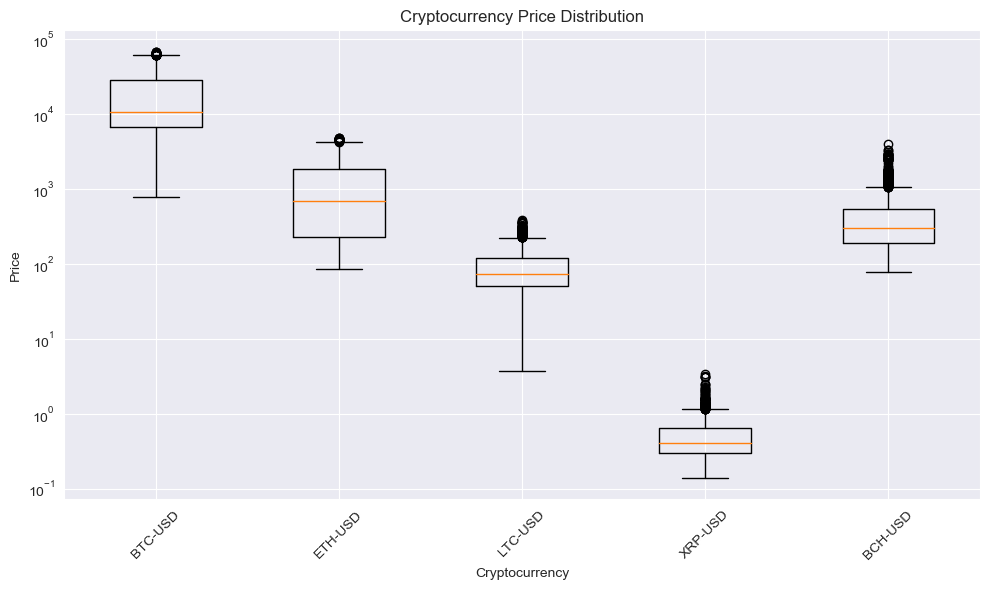

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbols for the coins you want to fetch
ticker_symbols = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'XRP-USD', 'BCH-USD']

# Define the date range you want to fetch
start_date = '2017-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Create an empty list to store the transformed DataFrames
transformed_dataframes = []

# Fetch data for each coin and perform transformations
for ticker_symbol in ticker_symbols:
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    data.reset_index(inplace=True)
    
    # Calculate daily returns
    data['Daily_Return'] = data['Close'].pct_change()
    
    # Add a Symbol column
    data['Symbol'] = ticker_symbol
    
    transformed_dataframes.append(data)

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(transformed_dataframes, ignore_index=True)

# Data Quality Checks and Consistency Checks (as before)

# Visualize Box Plots
plt.figure(figsize=(10, 6))
plt.title("Cryptocurrency Price Distribution")
plt.xlabel("Cryptocurrency")
plt.ylabel("Price")
plt.boxplot([combined_data[combined_data['Symbol'] == symbol]['Close'] for symbol in ticker_symbols],
            labels=ticker_symbols)
plt.yscale("log")  # Log scale for better visualization of extreme values
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/57/_5_d_jyx6dv75t7yln4024f00000gn/T/ipykernel_3617/2617294759.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter to make space for the title


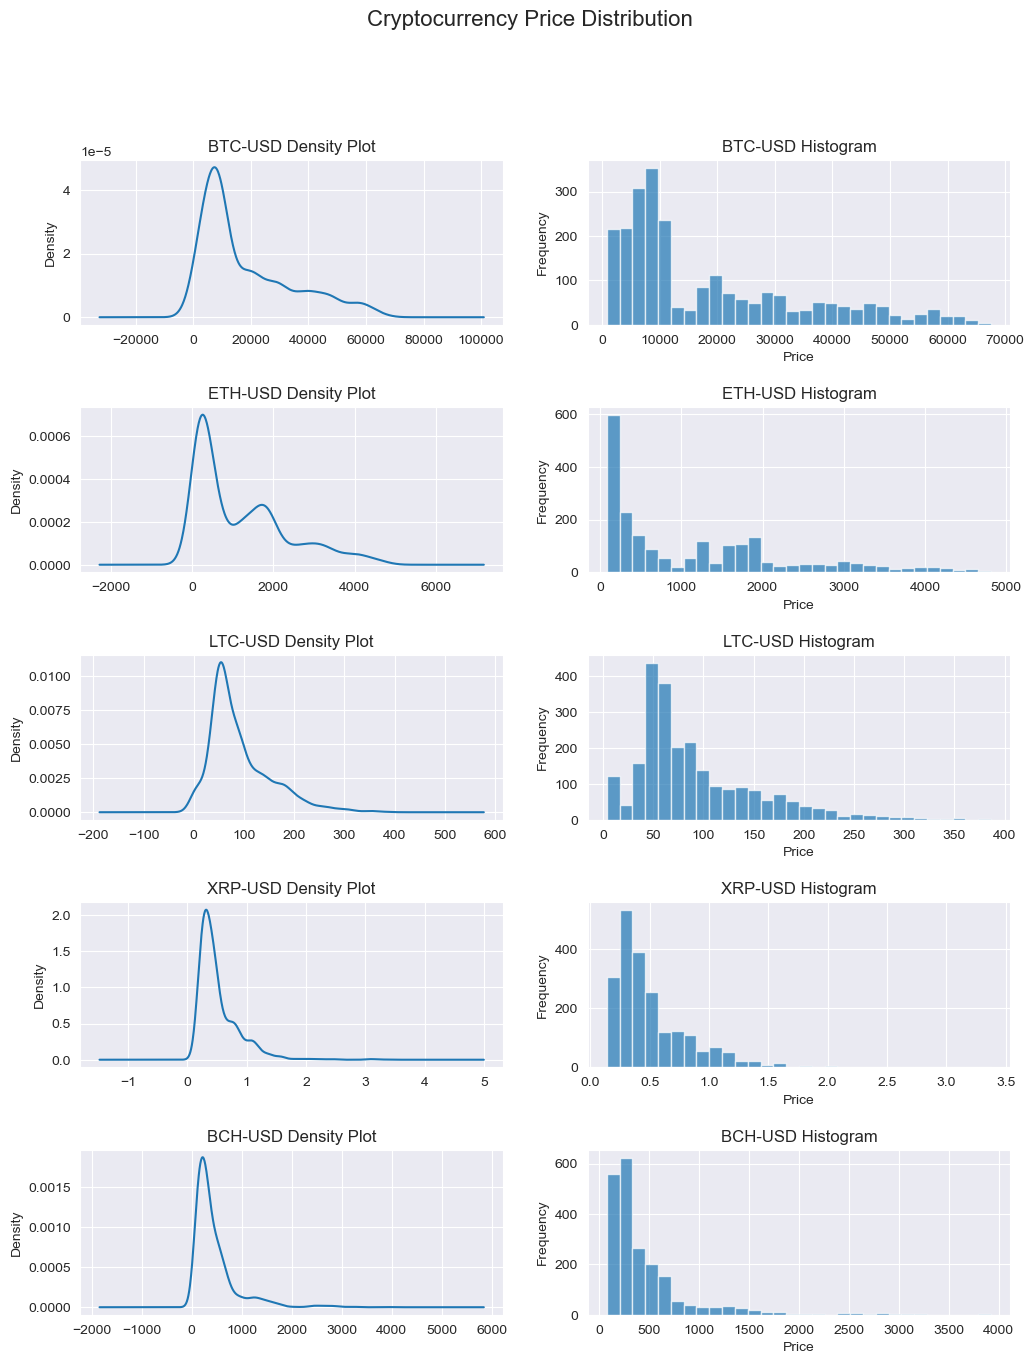

In [9]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbols for the coins you want to fetch
ticker_symbols = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'XRP-USD', 'BCH-USD']

# Define the date range you want to fetch
start_date = '2017-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Create an empty list to store the transformed DataFrames
transformed_dataframes = []

# Fetch data for each coin and perform transformations
for ticker_symbol in ticker_symbols:
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    data.reset_index(inplace=True)
    
    # Calculate daily returns
    data['Daily_Return'] = data['Close'].pct_change()
    
    # Add a Symbol column
    data['Symbol'] = ticker_symbol
    
    transformed_dataframes.append(data)

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(transformed_dataframes, ignore_index=True)

# Data Quality Checks and Consistency Checks (as before)

# Create subplots for Density Plots and Histograms
fig, axs = plt.subplots(len(ticker_symbols), 2, figsize=(12, 15), gridspec_kw={'hspace': 0.5})
fig.suptitle("Cryptocurrency Price Distribution", fontsize=16)

for idx, symbol in enumerate(ticker_symbols):
    subset_data = combined_data[combined_data['Symbol'] == symbol]
    
    # Density Plot
    axs[idx, 0].set_title(f'{symbol} Density Plot')
    subset_data['Close'].plot(kind='density', ax=axs[idx, 0])
    axs[idx, 0].set_ylabel('Density')
    
    # Histogram
    axs[idx, 1].set_title(f'{symbol} Histogram')
    subset_data['Close'].plot(kind='hist', bins=30, alpha=0.7, ax=axs[idx, 1])
    axs[idx, 1].set_xlabel('Price')
    axs[idx, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter to make space for the title
plt.show()


In [6]:
rolling_mean = btc.rolling(window = 12).mean()
rolling_std = btc.rolling(window = 12).std()
print(rolling_mean,rolling_std)

                  price
timestamp              
2013-10-06          NaN
2013-10-07          NaN
2013-10-08          NaN
2013-10-09          NaN
2013-10-10          NaN
...                 ...
2020-05-31  9227.725000
2020-06-01  9285.733333
2020-06-02  9324.741667
2020-06-03  9366.000000
2020-06-04  9402.625000

[2434 rows x 1 columns]                  price
timestamp             
2013-10-06         NaN
2013-10-07         NaN
2013-10-08         NaN
2013-10-09         NaN
2013-10-10         NaN
...                ...
2020-05-31  311.419916
2020-06-01  416.053328
2020-06-02  414.630461
2020-06-03  422.286441
2020-06-04  423.612514

[2434 rows x 1 columns]


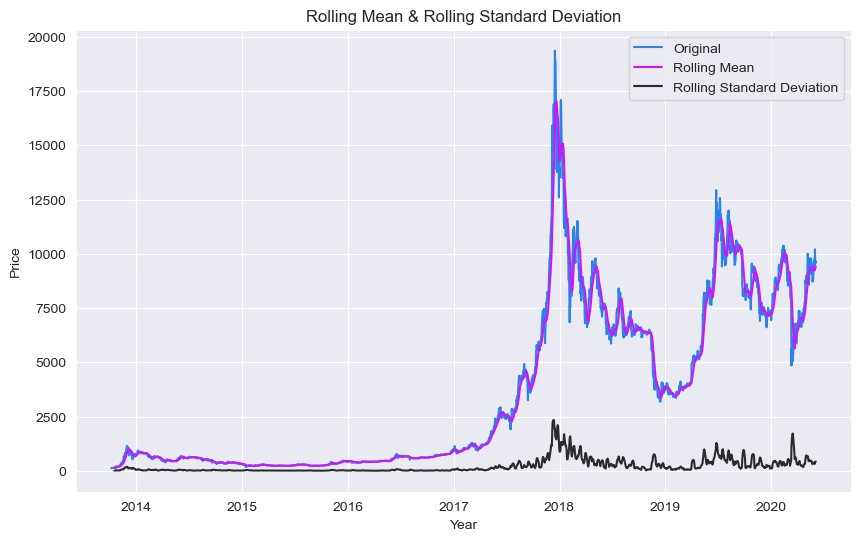

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(btc, color = '#2a83e8', label = 'Original')
plt.plot(rolling_mean, color = '#d014fa', label = 'Rolling Mean')
plt.plot(rolling_std, color = '#2b2b2e', label = 'Rolling Standard Deviation')
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('Price') 
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [9]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
result = adfuller(btc['price'], autolag='AIC')
result_output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result[4].items():
    result_output['Critical Value (%s)'%key] = value    
print(result_output)

Results of Dickey Fuller Test:
Test Statistic                   -1.502704
p-value                           0.532173
#Lags Used                       27.000000
Number of Observations Used    2406.000000
Critical Value (1%)              -3.433071
Critical Value (5%)              -2.862742
Critical Value (10%)             -2.567410
dtype: float64


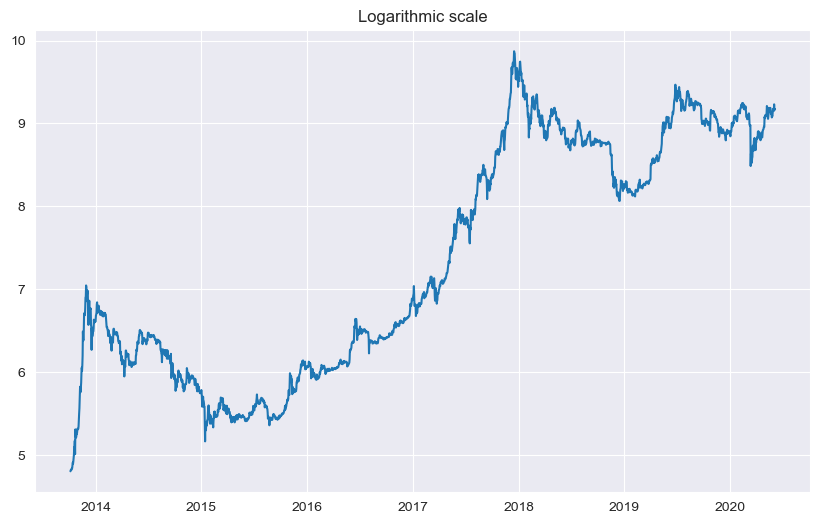

In [11]:
btc_log = np.log(btc)
plt.figure(figsize=(10, 6))
plt.title('Logarithmic scale')
plt.plot(btc_log)
plt.show()

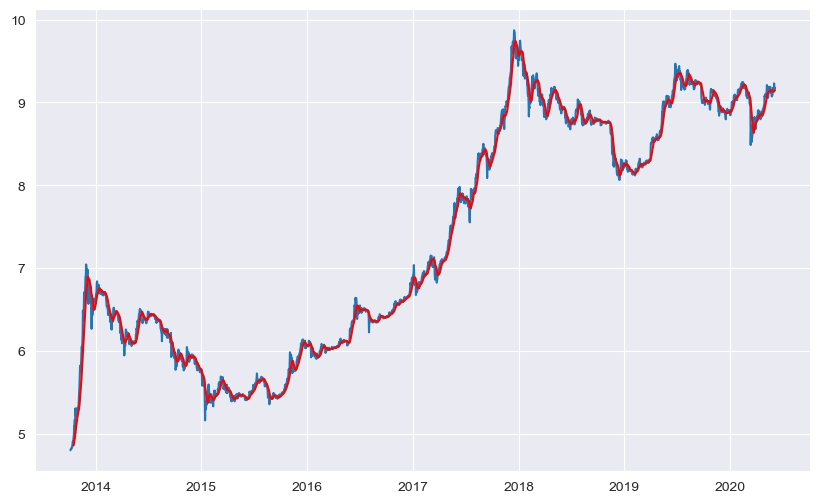

In [12]:
#The below transformation is required to make series stationary
movingAverage = btc_log.rolling(window=12).mean()
movingSTD = btc_log.rolling(window=12).std()

plt.figure(figsize=(10, 6))
plt.plot(btc_log)
plt.plot(movingAverage, color='red')
plt.show()

In [67]:
btcLogMinusMovingAverage = btc_log - movingAverage
btcLogMinusMovingAverage.head(12)

#Remove NAN values
btcLogMinusMovingAverage.dropna(inplace=True)
btcLogMinusMovingAverage.head(10)

,price
timestamp,
2013-10-17,0.105287
2013-10-18,0.124457
2013-10-19,0.190874
2013-10-20,0.168093
2013-10-21,0.217324
2013-10-22,0.041036
2013-10-23,0.300333
2013-10-24,0.184581
2013-10-25,0.141265


In [68]:
def test_stationarity(timeseries):
    
    # rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='#2a83e8', label='Original')
    mean = plt.plot(movingAverage, color='#d014fa', label='Rolling Mean')
    std = plt.plot(movingSTD, color='#2b2b2e', label='Rolling Standard Deviation')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('\nResults of Dickey Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    result_output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        result_output['Critical Value (%s)'%key] = value
    print(result_output)

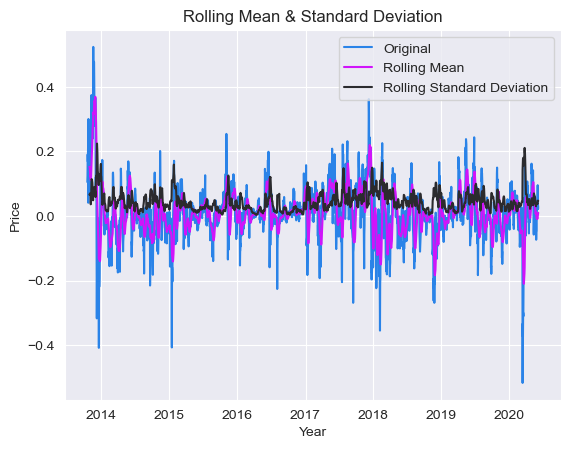


Results of Dickey Fuller Test:
Test Statistic                -1.037373e+01
p-value                        2.229398e-18
#Lags Used                     9.000000e+00
Number of Observations Used    2.413000e+03
Critical Value (1%)           -3.433063e+00
Critical Value (5%)           -2.862739e+00
Critical Value (10%)          -2.567408e+00
dtype: float64


In [69]:
test_stationarity(btcLogMinusMovingAverage)

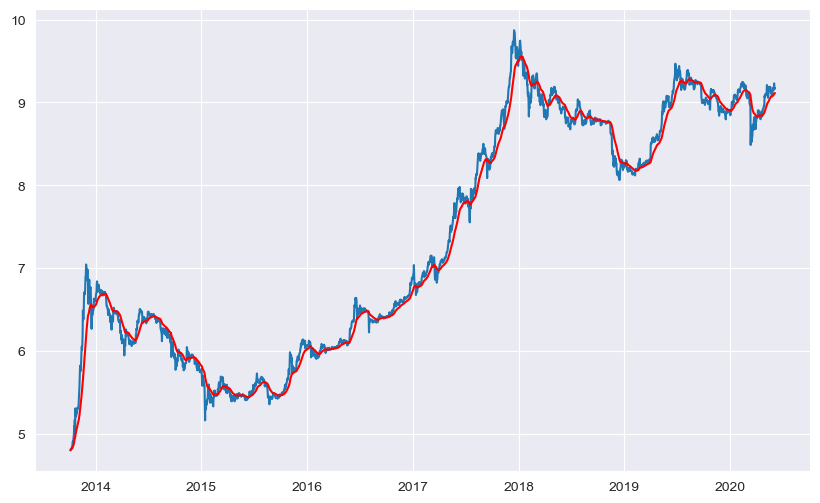

In [70]:
exponentialDecayWeightedAverage = btc_log.ewm(halflife=12, min_periods=0, adjust=True).mean()

plt.figure(figsize=(10, 6))
plt.plot(btc_log)
plt.plot(exponentialDecayWeightedAverage, color='red')
plt.show()

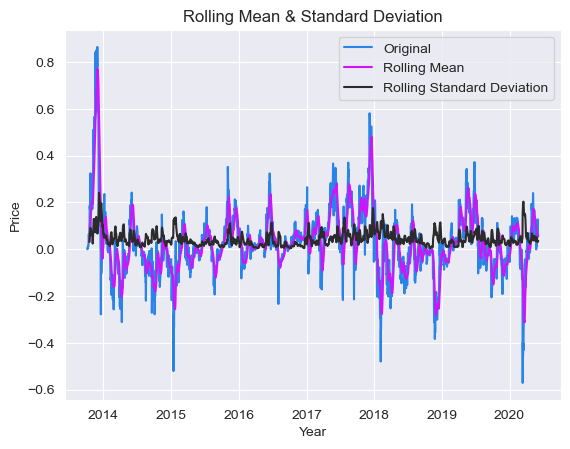


Results of Dickey Fuller Test:
Test Statistic                -6.922387e+00
p-value                        1.137711e-09
#Lags Used                     6.000000e+00
Number of Observations Used    2.427000e+03
Critical Value (1%)           -3.433047e+00
Critical Value (5%)           -2.862732e+00
Critical Value (10%)          -2.567404e+00
dtype: float64


In [71]:
btcLogMinusExponentialMovingAverage = btc_log - exponentialDecayWeightedAverage
test_stationarity(btcLogMinusExponentialMovingAverage)

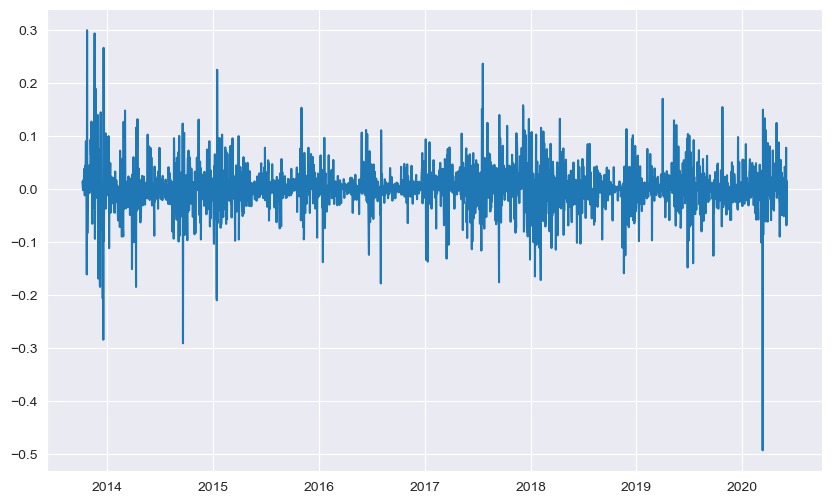

In [72]:
btcLogDiffShifting = btc_log - btc_log.shift()
plt.figure(figsize=(10, 6))
plt.plot(btcLogDiffShifting)
plt.show()

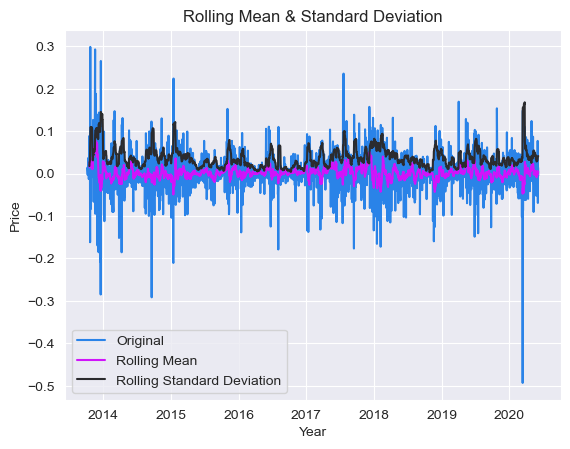


Results of Dickey Fuller Test:
Test Statistic                -1.291511e+01
p-value                        3.981183e-24
#Lags Used                     1.000000e+01
Number of Observations Used    2.422000e+03
Critical Value (1%)           -3.433053e+00
Critical Value (5%)           -2.862734e+00
Critical Value (10%)          -2.567406e+00
dtype: float64


In [73]:
btcLogDiffShifting.dropna(inplace=True)
test_stationarity(btcLogDiffShifting)

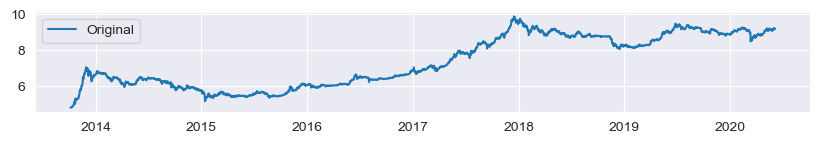

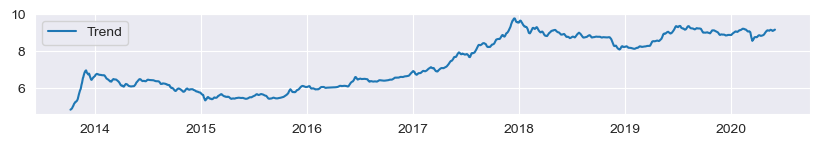

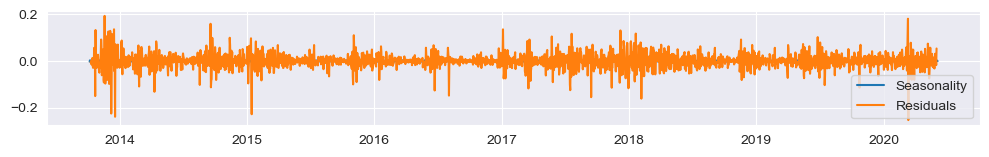

In [74]:
decomposition = seasonal_decompose(btc_log) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(btc_log, label='Original')
plt.legend(loc='best')

plt.figure(figsize=(10, 6))
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

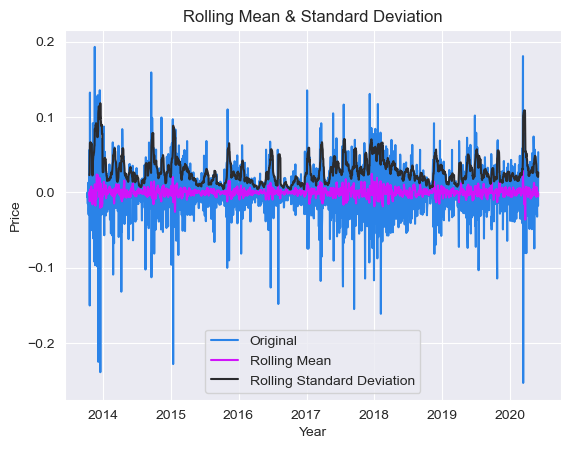


Results of Dickey Fuller Test:
Test Statistic                -1.552883e+01
p-value                        2.234069e-28
#Lags Used                     2.300000e+01
Number of Observations Used    2.404000e+03
Critical Value (1%)           -3.433073e+00
Critical Value (5%)           -2.862743e+00
Critical Value (10%)          -2.567410e+00
dtype: float64


In [75]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


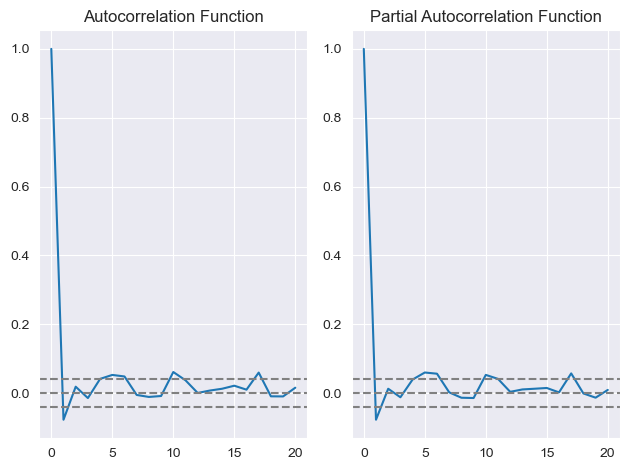

In [76]:
#ACF & PACF plots
lag_acf = acf(btcLogDiffShifting, nlags=20)
lag_pacf = pacf(btcLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(btcLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(btcLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(btcLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(btcLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

In [ ]:
rolling_window = st.slider("Rolling Window Size", min_value=1, max_value=len(price_data), value=30)
            rolling_means = calculate_rolling_means(price_data, rolling_window)
            # Calculate market sentiment and display signal
            market_sentiment = detect_market_sentiment(price_data, rolling_means)
            st.write(f"Market sentiment: {market_sentiment}")